In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, t = sp.symbols('x, t', real=True)
a, lamb, R, v, delta = sp.symbols(r'a, \lambda, R, v, \delta', real=True)

kink = sp.tanh((x + a)/delta)
antikink = -sp.tanh((x - a)/delta)
y = kink + antikink - 1

V = lamb*(y**2 - 1)**2/2
f = -(y.diff(x)**2 + y.diff(t)**2)/2 + V
f

\lambda*((-tanh((-a + x)/\delta) + tanh((a + x)/\delta) - 1)**2 - 1)**2/2 - (-(1 - tanh((-a + x)/\delta)**2)/\delta + (1 - tanh((a + x)/\delta)**2)/\delta)**2/2

In [60]:
F = f.subs(x, 0) - f.subs(x, -sp.oo)
F

\lambda*((2*tanh(a/\delta) - 1)**2 - 1)**2/2

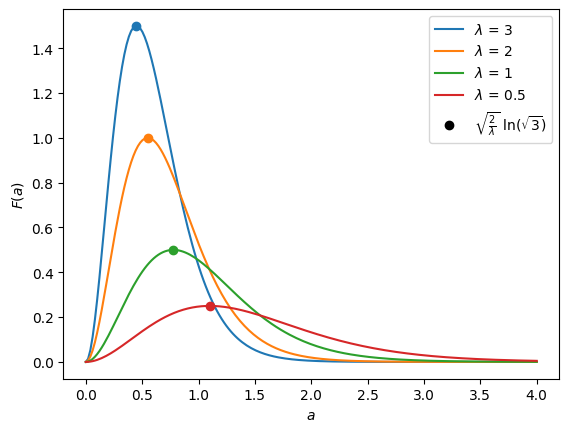

In [58]:
func = sp.lambdify((a, lamb), F.subs({delta: sp.sqrt(2/lamb)}))
X = np.linspace(0, 4, 200)
for i, l in enumerate((0.5, 1, 2, 3)[::-1]):
    F_val = func(X, l)
    plt.plot(X, F_val, f'C{i}-', label=r'$\lambda$ = {}'.format(l))
    plt.plot(np.sqrt(2/l)*np.log(np.sqrt(3)), F_val.max(), f'C{i}o')
plt.plot([], [], 'ko', label=r'$\sqrt{\frac{2}{\lambda}}\,\,\ln(\sqrt{3})$')
plt.legend()
plt.xlabel(r'$a$')
plt.ylabel(r'$F(a)$')
plt.show()

In [41]:
sp.Matrix(sp.solve(F.diff(a), a))

Matrix([
[                           0],
[\delta*(log(sqrt(3)) + I*pi)],
[         \delta*log(sqrt(3))],
[                 I*pi*\delta]])

In [11]:
F_sim = F.subs({sp.tanh(a/delta): 1 - 2*sp.exp(-2*a/delta)}).simplify()
F_sim

32*\lambda*(exp(4*a/\delta) - 4*exp(2*a/\delta) + 4)*exp(-8*a/\delta)

(-0.2, 5.0)

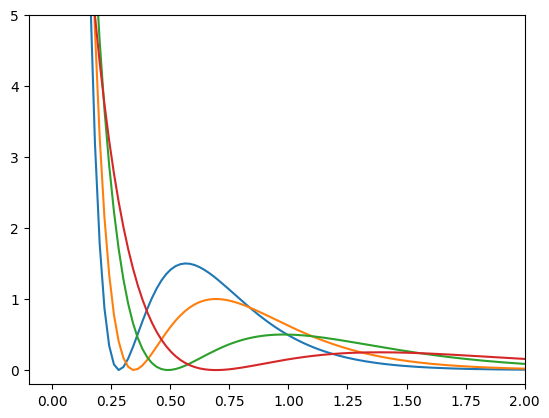

In [18]:
func = sp.lambdify((a, lamb), F_sim.subs({delta: sp.sqrt(2/lamb)}))
X = np.linspace(0, 4, 200)
for l in (0.5, 1, 2, 3)[::-1]:
    plt.plot(X, func(X, l))
plt.xlim(-0.1, 2)
plt.ylim(-0.2, 5)

(-0.2, 1.75)

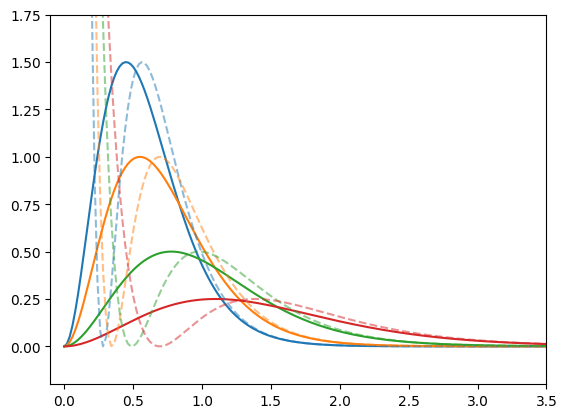

In [27]:
func = sp.lambdify((a, lamb), F.subs({delta: sp.sqrt(2/lamb)}))
X = np.linspace(0, 4, 200)
for i, l in enumerate((0.5, 1, 2, 3)[::-1]):
    plt.plot(X, func(X, l), f'C{i}')

func = sp.lambdify((a, lamb), F_sim.subs({delta: sp.sqrt(2/lamb)}))
X = np.linspace(0, 4, 200)
for i, l in enumerate((0.5, 1, 2, 3)[::-1]):
    plt.plot(X, func(X, l), f'C{i}--', alpha=0.5)
plt.xlim(-0.1, 3.5)
plt.ylim(-0.2, 1.75)